In [ ]:
# Import necessary packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
def input_img(path):
    image = tf.image.decode_png(tf.io.read_file(path))
    image = tf.expand_dims(image, axis=0)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [224,224])
    return image
def normalize_image(img):
    grads_norm = img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm = (grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm
def get_image():
    import urllib.request
    filename = 'image.jpg'
    img_url = r"https://upload.wikimedia.org/wikipedia/commons/d/d7/White_stork_%28Ciconia_ciconia%29_on_nest.jpg"
    urllib.request.urlretrieve(img_url, filename)
def plot_maps(img1, img2,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(img1,vmin=vmin, vmax=vmax, cmap="ocean")
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(img2, cmap = "ocean")
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(img1*mix_val+img2/mix_val, cmap = "ocean" )
    plt.axis("off")

[[('n01930112', 'nematode', 0.12633206),
  ('n03729826', 'matchstick', 0.04434759),
  ('n03804744', 'nail', 0.026243387),
  ('n02783161', 'ballpoint', 0.023096845),
  ('n03041632', 'cleaver', 0.018269444)]]

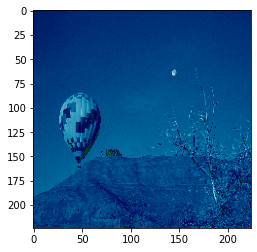

In [ ]:
test_model = tf.keras.applications.resnet50.ResNet50()
#test_model.summary()
get_image()
img_path = "/content/ballooning_0.jpg"
input_img = input_img(img_path)
input_img = tf.keras.applications.densenet.preprocess_input(input_img)
plt.imshow(normalize_image(input_img[0]), cmap = "ocean")
result = test_model(input_img)
max_idx = tf.argmax(result,axis = 1)
tf.keras.applications.imagenet_utils.decode_predictions(result.numpy())

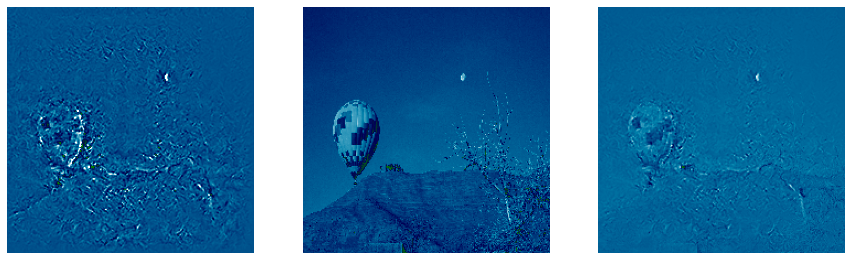

In [ ]:
with tf.GradientTape() as tape:
    tape.watch(input_img)
    result = test_model(input_img)
    max_score = result[0,max_idx[0]]
grads = tape.gradient(max_score, input_img)
plot_maps(normalize_image(grads[0]), normalize_image(input_img[0]))